- Author：kuhung （https://github.com/kuhung）
- Create time：2017/5/11

In [26]:
import pandas as pd
%matplotlib inline

In [39]:
train = pd.read_csv('../dataset/pre/train.csv')
test = pd.read_csv('../dataset/pre/test.csv')

train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(4088017, 10)

In [37]:
train['clickTime'].max(),train['clickTime'].min()

(302359, 170000)

### 对感兴趣的特征进行观察

- 查看训练集日转化量

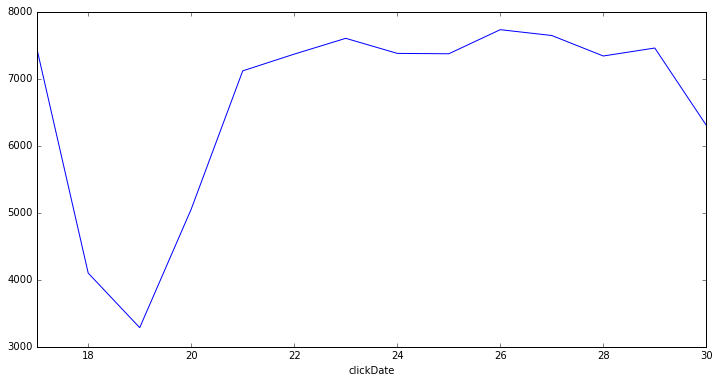

In [28]:
train['clickDate'] = train['clickTime'].apply(lambda x : x/10000)

train.groupby(['clickDate']).sum() ['label'].plot(figsize=(12,6))

In [31]:
train.groupby(['clickDate']).sum() ['label']

clickDate
17    7464
18    4101
19    3286
20    5056
21    7121
22    7371
23    7607
24    7382
25    7376
26    7736
27    7649
28    7343
29    7462
30    6308
Name: label, dtype: int64

- 结论：
 1. 18\19\20的数据存在异常，使用时应慎重/ 后期注意排查
 2. 30号的数据出现滑坡，推测可能是部分样本未得到统计。不建议把30号的数据作为训练或验证集。
 
 3. 即：目前可用的数据为 21-29 九天数据。

### 查看总数据的用户数目以及广告数目

In [51]:
data.shape[0]

4088017

In [48]:
len(data['userID'].unique()),len(data['creativeID'].unique())

(2805118, 6582, 2595627, 6315)

In [49]:
len(train['userID'].unique()),len(train['creativeID'].unique()),len(test['userID'].unique()),len(test['creativeID'].unique())

(2595627, 6315, 297466, 2173)

In [63]:
print '\n同一用户出现的平均次数:'
print float(data.shape[0])/len(data['userID'].unique())   

print '\n同一广告曝光的平均次数:'
print float(data.shape[0])/len(data['creativeID'].unique())

print '\n同一广告曝光在同一用户的平均次数:'
print float(len(data['userID'].unique()))   /len(data['creativeID'].unique())

print '\n训练集中同一广告曝光在同一用户的平均次数:'
print float(len(train['userID'].unique()))   /len(train['creativeID'].unique())

print '\n测试集中同一广告曝光在同一用户的平均次数:'
print float(len(test['userID'].unique()))   /len(test['creativeID'].unique())


同一用户出现的平均次数:
1.45734225797

同一广告曝光的平均次数:
621.090398055

同一广告曝光在同一用户的平均次数:
426.180188393

训练集中同一广告曝光在同一用户的平均次数:
411.025653207

测试集中同一广告曝光在同一用户的平均次数:
136.891854579


In [66]:
data['userID'].value_counts().head()

1884671    113
865369     101
2177410     98
674047      86
2453862     79
Name: userID, dtype: int64

In [73]:
data[(data.userID == 2453862) & (data.label ==1)].shape

(0, 10)

In [ ]:
data

- 结论：平均而言，每个用户出现了1.5次，属于理想状态。